In [11]:
import geopandas as gpd

# Carregar o arquivo GeoPackage
gdf = gpd.read_file('burned_areas.gpkg')

# Mostrar as primeiras linhas do GeoDataFrame
print(gdf.head())


   id areatype        date                                           geometry
0   2   burned  2022-09-29  MULTIPOLYGON (((-48.00616 -15.59433, -48.00579...


Malha 100x100 criada e salva como 'mesh_100x100.gpkg'


/tmp/ipykernel_675105/1341756528.py:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


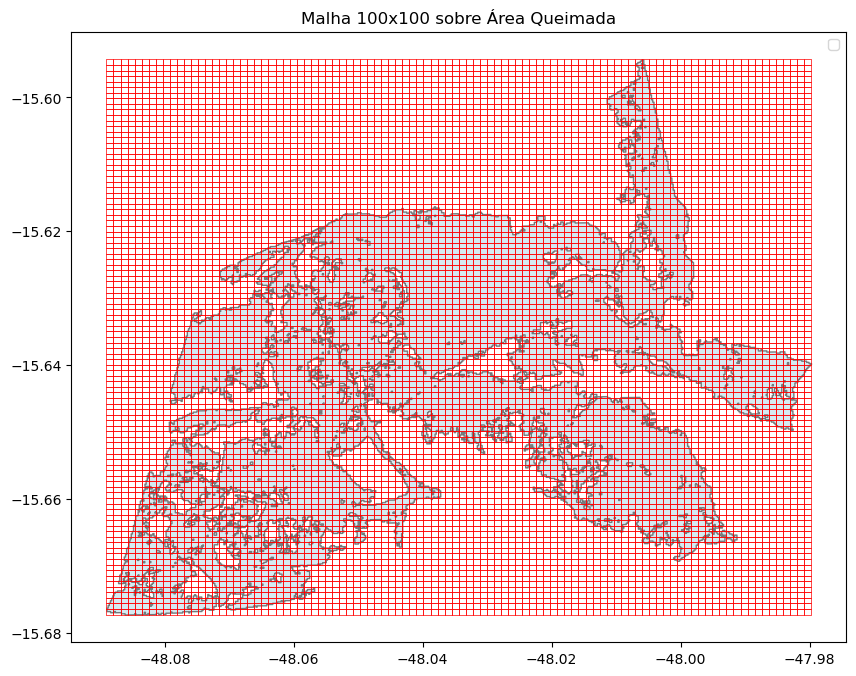

In [14]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Carregar o arquivo geospatial
gdf = gpd.read_file('burned_areas.gpkg')

# Assumindo que há apenas uma geometria (ou que você quer a geometria da primeira feição)
geom = gdf.geometry.unary_union

# Obter limites da geometria (min_x, min_y, max_x, max_y)
min_x, min_y, max_x, max_y = geom.bounds

# Criar a malha 100x100 dentro dos limites
x_coords = np.linspace(min_x, max_x, 101)  # 101 para obter 100 intervalos
y_coords = np.linspace(min_y, max_y, 101)  # 101 para obter 100 intervalos

# Criar uma lista para armazenar os polígonos da malha
polygons = []

# Criar a malha de polígonos
for x in range(len(x_coords) - 1):
    for y in range(len(y_coords) - 1):
        # Definir os pontos do retângulo
        x_min = x_coords[x]
        x_max = x_coords[x + 1]
        y_min = y_coords[y]
        y_max = y_coords[y + 1]

        # Criar o retângulo como um polígono
        rect = Polygon([(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)])
        polygons.append(rect)

# Criar um GeoDataFrame para a malha
mesh_gdf = gpd.GeoDataFrame(geometry=polygons, crs=gdf.crs)

# Salvar o GeoDataFrame em um novo arquivo
mesh_gdf.to_file('mesh_100x100.gpkg', driver='GPKG')

print("Malha 100x100 criada e salva como 'mesh_100x100.gpkg'")

# Visualizar a malha e o polígono original
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o polígono original
gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Área Queimada')

# Plotar a malha
mesh_gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.5, label='Malha 100x100')

# Adicionar título e legenda
ax.set_title('Malha 100x100 sobre Área Queimada')
ax.legend()

# Exibir o gráfico
plt.show()


In [28]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

gdf = gpd.read_file('burned_areas.gpkg')

geom = gdf.geometry.unary_union

min_x, min_y, max_x, max_y = geom.bounds

x_coords = np.linspace(min_x, max_x, 21)
y_coords = np.linspace(min_y, max_y, 21) 

points_data = []

for x in x_coords:
    for y in y_coords:
        point = Point(x, y)
        inside = 1 if geom.contains(point) else 0
        points_data.append({'x': x, 'y': y, 'inside': inside})

df = pd.DataFrame(points_data)

df.to_csv('points_20x20.csv', index=False)

print("Pontos 20x20 salvos em 'points_20x20.csv'")


Pontos 20x20 salvos em 'points_20x20.csv'


# sobre o dataset 

Eu estou criando um dataset que sei que é visível após o dia 09/09/2022 uma queimada no parque nacional de brasília 

/tmp/ipykernel_675105/1327037906.py:31: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


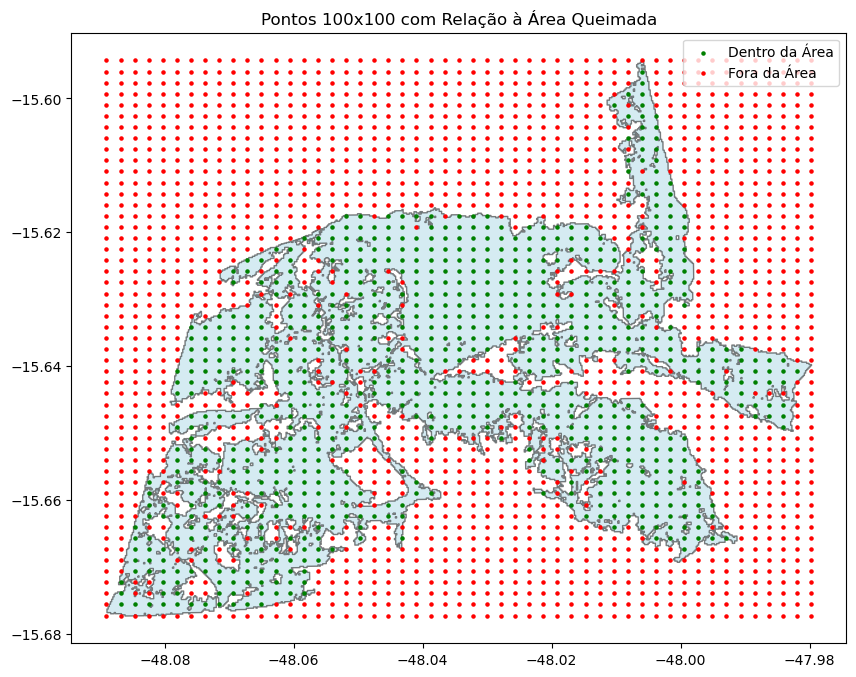

In [29]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Carregar o CSV com os dados dos pontos
points_df = pd.read_csv('points_10x10.csv')

# Carregar o arquivo geospatial com a área de interesse
gdf = gpd.read_file('burned_areas.gpkg')

# Assumindo que há apenas uma geometria (ou que você quer a geometria da primeira feição)
geom = gdf.geometry.unary_union

# Criar um GeoDataFrame a partir dos dados do CSV
geometry = [Point(xy) for xy in zip(points_df.x, points_df.y)]
points_gdf = gpd.GeoDataFrame(points_df, geometry=geometry, crs=gdf.crs)

# Plotar
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar a área de interesse
gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Área Queimada')

# Plotar os pontos: verde se dentro, vermelho se fora
points_gdf[points_gdf['inside'] == 1].plot(ax=ax, color='green', markersize=5, label='Dentro da Área')
points_gdf[points_gdf['inside'] == 0].plot(ax=ax, color='red', markersize=5, label='Fora da Área')

# Adicionar título e legenda
ax.set_title('Pontos 100x100 com Relação à Área Queimada')
ax.legend()

# Exibir o gráfico
plt.show()


In [30]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Carregar o CSV com os dados dos pontos
points_df = pd.read_csv('points_10x10.csv')

# Criar a geometria dos pontos a partir das coordenadas
geometry = [Point(xy) for xy in zip(points_df.x, points_df.y)]

# Criar um GeoDataFrame a partir dos dados do CSV
points_gdf = gpd.GeoDataFrame(points_df, geometry=geometry, crs='EPSG:4326')

# Salvar o GeoDataFrame em um arquivo Shapefile
points_gdf.to_file('points_20x20.shp', driver='ESRI Shapefile')

print("Shapefile 'points_10x10.shp' criado com sucesso.")


Shapefile 'points_10x10.shp' criado com sucesso.


Em seguida foi extraida a série temporal de queimada e nào queimada em um primeiro momento somente do ndvi e caso dê tempo sera calculada a de nbr tambem 

In [35]:
import pandas as pd
from sklearn.model_selection import train_data_data_data_test_split

# Carregar o CSV
file_path = 'filtered_filled_ndvi_sample_v3.csv'
df = pd.read_csv(file_path)

# Separar a coluna de datas
dates = df[['data']]  # Supondo que a coluna de datas seja chamada 'data'

# Separar os dados de amostras (remover a coluna de datas)
samples = df.drop(columns=['data'])

# Transpor o DataFrame para que cada coluna seja uma amostra e cada linha uma data
samples_transposed = samples.T

# Separar as amostras em dados de treino e teste
train_samples, test_samples = train_test_split(samples_transposed, test_size=0.3, random_state=42)

# Transpor os dados de volta ao formato original
train_samples = train_samples.T
test_samples = test_samples.T

# Reunir os dados de amostras com a coluna de datas
train_data = pd.concat([dates, train_samples], axis=1)
test_data = pd.concat([dates, test_samples], axis=1)

# Salvar os conjuntos de treino e teste em novos arquivos CSV
train_data.to_csv('dados_treinamento.csv', index=False)
test_data.to_csv('dados_teste.csv', index=False)

print("Os dados foram divididos e salvos em 'dados_treinamento.csv' e 'dados_teste.csv'.")


Os dados foram divididos e salvos em 'dados_treinamento.csv' e 'dados_teste.csv'.


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


2024-09-01 03:11:50.229835: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-01 03:11:50.293148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 03:11:50.738159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-01 03:11:50.741234: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-01 03:11:51.956021: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [40]:

import pandas as pd

# Definir os caminhos dos arquivos
train_file_path = 'dados_treinamento.csv'
test_file_path = 'dados_teste.csv'

# Ler os arquivos CSV
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Mostrar as primeiras linhas de cada DataFrame para conferência
print("Dados de Treinamento:")
print(train_data.head())

print("\nDados de Teste:")
print(test_data.head())


Dados de Treinamento:
         data     0.225      0.94    1.112     0.284      0.23     0.244  \
0  2020-05-24  0.729493  0.521000  0.78196 -0.437500  0.722944  0.767507   
1  2020-06-09  0.694400  0.406317  0.76440 -0.328083  0.682400  0.742000   
2  2020-06-25  0.675357  0.352600  0.71256 -0.214900  0.648566  0.718143   
3  2020-07-11  0.659700  0.290554  0.68030 -0.159486  0.615100  0.704500   
4  2020-07-27  0.637280  0.250906  0.65680 -0.083000  0.579300  0.672277   

       1.72      1.25       0.5  ...     0.330     0.214     1.116     0.121  \
0  0.671667  0.636700  0.448519  ...  0.895800  0.612100  0.663016  0.592264   
1  0.617600  0.566149  0.556300  ...  0.893563  0.557703  0.628900  0.542600   
2  0.575003  0.533100  0.572611  ...  0.891700  0.527000  0.603794  0.498086   
3  0.547800  0.496720  0.549600  ...  0.885900  0.501800  0.579500  0.466600   
4  0.521200  0.462400  0.552986  ...  0.880089  0.468000  0.549743  0.434100   

       0.20      0.71     0.106     0.27

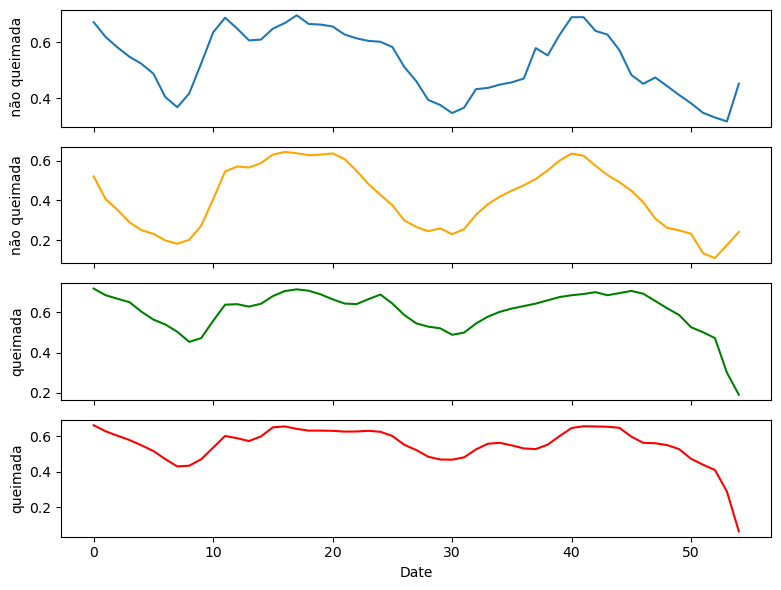

In [49]:
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
train_data['0.20'].plot(ax=axes[0])
axes[0].set_ylabel(" não queimada")
train_data['0.94'].plot(ax=axes[1], color='orange')
axes[1].set_ylabel("não queimada")
train_data['1.85'].plot(ax=axes[2], color='green')
axes[2].set_ylabel("queimada")
train_data['1.116'].plot(ax=axes[3], color='red')
axes[3].set_ylabel("queimada")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [53]:
scaler = MinMaxScaler()

#Treino
scaled_meantemp = scaler.fit_transform(train_data[['0.20']])
scaled_humidity = scaler.fit_transform(train_data[['0.94']])
scaled_wind_speed = scaler.fit_transform(train_data[['1.85']])
scaled_meanpressure = scaler.fit_transform(train_data[['1.116']])

#Teste

scaled_meantemp_test = scaler.fit_transform(test_data[['0.275']])
scaled_humidity_test = scaler.fit_transform(test_data[['0.93']])
scaled_wind_speed_test = scaler.fit_transform(test_data[['1.10']])
scaled_meanpressure_test = scaler.fit_transform(test_data[['1.163']])

In [54]:
#Quantidade de pontos no treino:
int(len(scaled_meantemp)*0.7)

38

In [55]:
from keras.preprocessing.sequence import TimeseriesGenerator


n_features = 1
n_input = 3

#train:
train_1 = TimeseriesGenerator(scaled_meantemp[:int(0.7*len(scaled_meantemp))],
                                scaled_meantemp[:int(0.7*len(scaled_meantemp))],
                                length=3,
                                batch_size=1)
X, y = train_1[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

train_2 = TimeseriesGenerator(scaled_meantemp[:int(0.7*len(scaled_meantemp))],
                                scaled_meantemp[:int(0.7*len(scaled_meantemp))],
                                length=12,
                                batch_size=1)
X, y = train_2[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')



#validation:
val_1 = TimeseriesGenerator(scaled_meantemp[int(0.7*len(scaled_meantemp)):],
                                scaled_meantemp[int(0.7*len(scaled_meantemp)):],
                                length=3,
                                batch_size=1)
X, y = val_1[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

val_2 = TimeseriesGenerator(scaled_meantemp[int(0.7*len(scaled_meantemp)):],
                                scaled_meantemp[int(0.7*len(scaled_meantemp)):],
                                length=12,
                                batch_size=1)
X, y = val_2[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')



#test
n_features = 1
test_1 = TimeseriesGenerator(scaled_meantemp_test,
                                scaled_meantemp_test,
                                length=3,
                                batch_size=1)
X, y = test_1[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

test_2 = TimeseriesGenerator(scaled_meantemp_test,
                                scaled_meantemp_test,
                                length=12,
                                batch_size=1)
X, y = test_2[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.93629807 0.7956424  0.69702098]
Predict this y: 
 [[0.60922211]]
Given the Array: 
[0.93629807 0.7956424  0.69702098 0.60922211 0.54302325 0.45037341
 0.22940969 0.13401904 0.2649512  0.54647095 0.83890255 0.97736212]
Predict this y: 
 [[0.87613399]]
Given the Array: 
[0.62226511 0.81699979 0.98236351]
Predict this y: 
 [[0.98236351]]
Given the Array: 
[0.62226511 0.81699979 0.98236351 0.98236351 0.85320728 0.81863376
 0.67227725 0.43880628 0.35481299 0.41431075 0.333213   0.24952806]
Predict this y: 
 [[0.17108519]]
Given the Array: 
[0.81815967 0.79768884 0.78261793]
Predict this y: 
 [[0.72098755]]
Given the Array: 
[0.81815967 0.79768884 0.78261793 0.72098755 0.68117906 0.65921335
 0.57502454 0.50804656 0.5557191  0.67226446 0.6489932  0.4244126 ]
Predict this y: 
 [[0.67767065]]


In [56]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
history_1=model.fit(train_1, epochs=50, validation_data=val_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-09-01 03:27:36.370286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-01 03:27:36.372292: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 0.2764 - val_loss: 0.0836
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0750 - val_loss: 0.0592
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.0479
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.0570
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0352
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0416 - val_loss: 0.0359
Epoch 7/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0365
Epoch 8/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0335
Epoch 9/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0349 - val_loss: 0.0388
Epoch 10/50
35/35 [==============================] - 0s 3ms/step - loss: 0.0363 - val_loss: 0.0286
Epoch 11/50
35/35 [

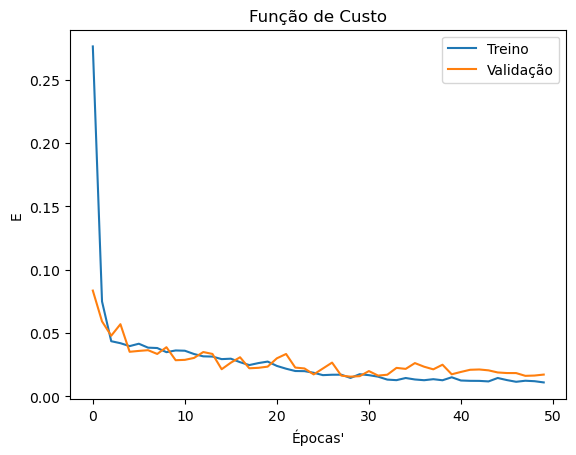

In [57]:
plt.figure()
plt.plot(history_1.history["loss"], label = "Treino")
plt.plot(history_1.history["val_loss"], label = "Validação")
plt.title("Função de Custo")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

52/52 [==============================] - 0s 838us/step


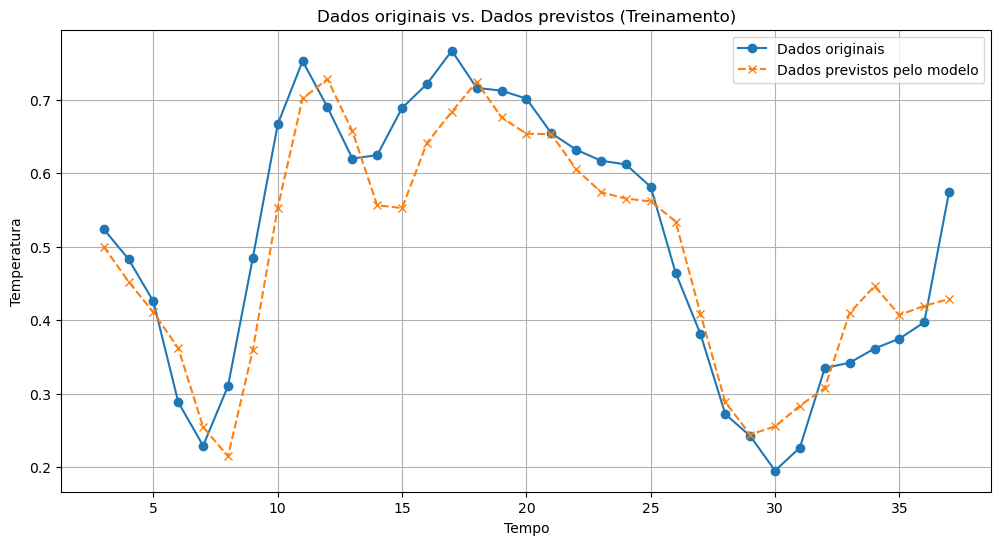

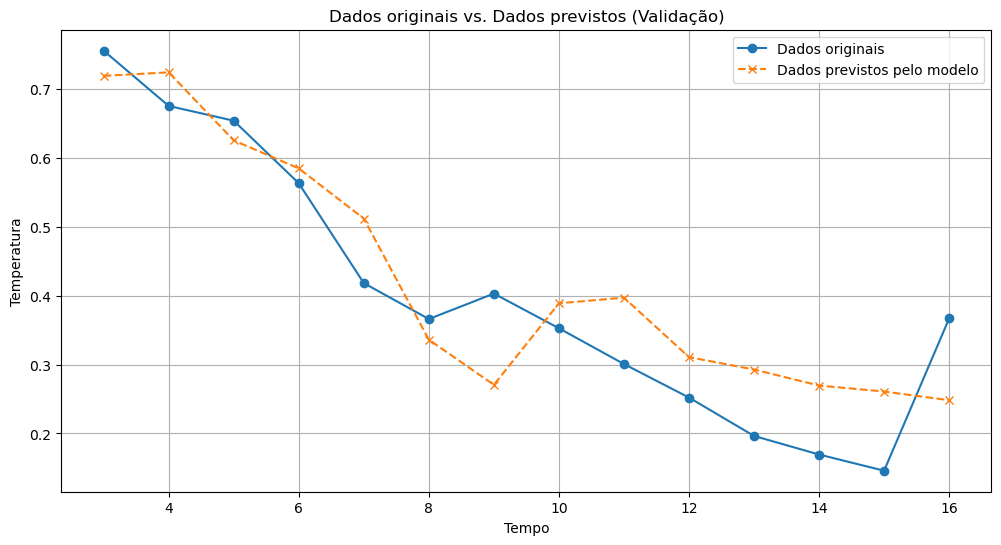

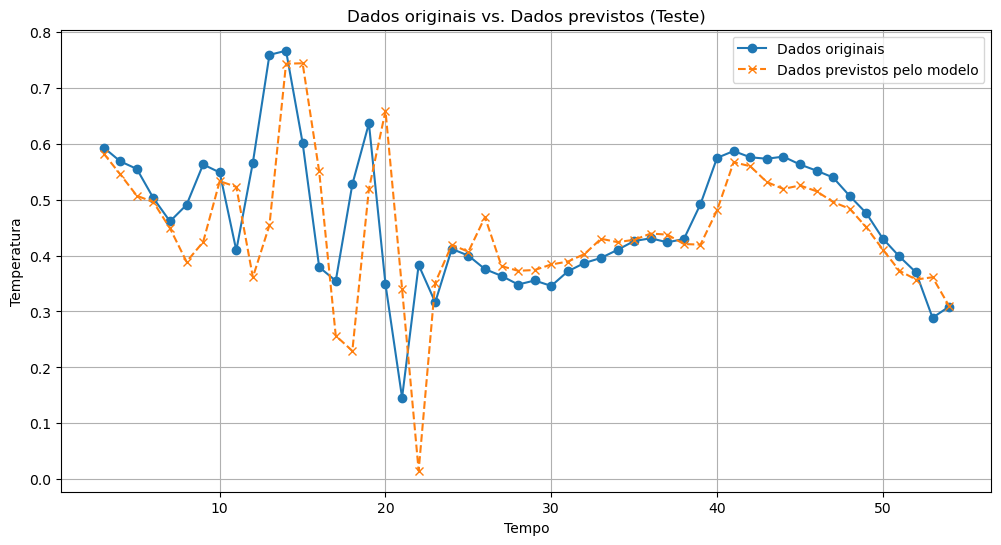

In [58]:
import matplotlib.pyplot as plt

#Treino
predicted_values = model.predict(train_1)

predicted_values = scaler.inverse_transform(predicted_values)
true_values = scaler.inverse_transform(train_1.targets)

# Create a time index for plotting
time_index = range(len(true_values) - len(predicted_values), len(true_values))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, [x[0] for x in true_values][3:], label="Dados originais", marker='o')
plt.plot(time_index, predicted_values, label="Dados previstos pelo modelo", linestyle='--', marker='x')
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos (Treinamento)")
plt.legend()
plt.grid(True)

#Validation:
# Generate predictions on the test dataset
predicted_values = model.predict(val_1)

# Inverse transform the scaled data to obtain actual values
# Replace the scaling logic with your own if you used a different method
predicted_values = scaler.inverse_transform(predicted_values)
true_values = scaler.inverse_transform(val_1.targets)

# Create a time index for plotting
time_index = range(len(true_values) - len(predicted_values), len(true_values))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, [x[0] for x in true_values][3:], label="Dados originais", marker='o')
plt.plot(time_index, predicted_values, label="Dados previstos pelo modelo", linestyle='--', marker='x')
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos (Validação)")
plt.legend()
plt.grid(True)

#Test:

# Generate predictions on the test dataset
predicted_values = model.predict(test_1)

# Inverse transform the scaled data to obtain actual values
# Replace the scaling logic with your own if you used a different method
predicted_values = scaler.inverse_transform(predicted_values)
true_values = scaler.inverse_transform(test_1.targets)

# Create a time index for plotting
time_index = range(len(true_values) - len(predicted_values), len(true_values))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, [x[0] for x in true_values][3:], label="Dados originais", marker='o')
plt.plot(time_index, predicted_values, label="Dados previstos pelo modelo", linestyle='--', marker='x')
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos (Teste)")
plt.legend()
plt.grid(True)

plt.show()

52/52 [==============================] - 0s 842us/step


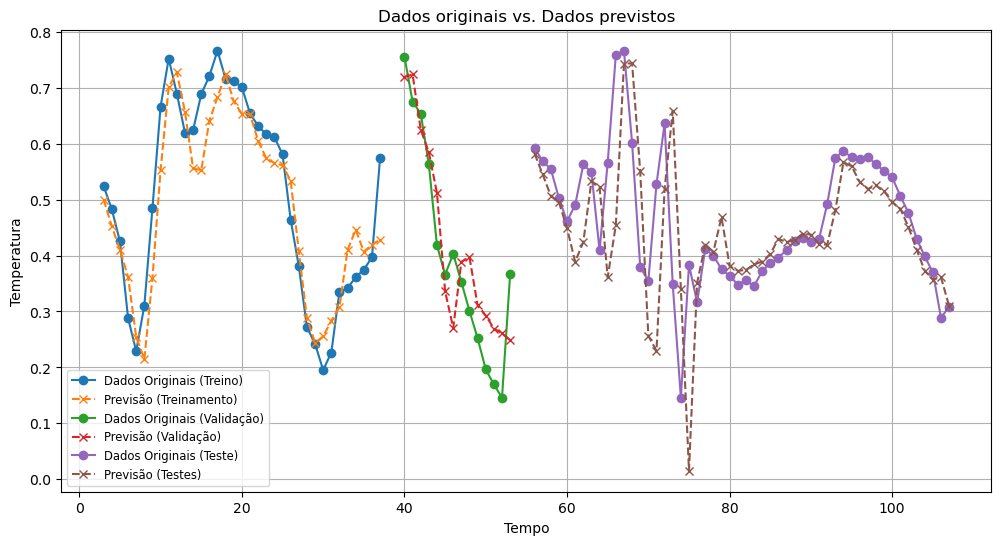

In [59]:
import matplotlib.pyplot as plt

# Train
predicted_values_train = model.predict(train_1)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
true_values_train = scaler.inverse_transform(train_1.targets)

# Validation
predicted_values_val = model.predict(val_1)
predicted_values_val = scaler.inverse_transform(predicted_values_val)
true_values_val = scaler.inverse_transform(val_1.targets)

# Test
predicted_values_test = model.predict(test_1)
predicted_values_test = scaler.inverse_transform(predicted_values_test)
true_values_test = scaler.inverse_transform(test_1.targets)

# Create a time index for plotting
time_index_train = range(len(true_values_train) - len(predicted_values_train), len(true_values_train))
time_index_val = range(len(true_values_val) - len(predicted_values_val) + time_index_train[-1], len(true_values_val) + time_index_train[-1])
time_index_test = range(len(true_values_test) - len(predicted_values_test) + time_index_val[-1], len(true_values_test) + time_index_val[-1])

# Create a single canvas and plot all the curves
plt.figure(figsize=(12, 6))

# Train data
plt.plot(time_index_train, [x[0] for x in true_values_train][3:], label="Dados Originais (Treino)", marker='o')
plt.plot(time_index_train, predicted_values_train, label="Previsão (Treinamento)", linestyle='--', marker='x')

# Validation data
plt.plot(time_index_val, [x[0] for x in true_values_val][3:], label="Dados Originais (Validação)", marker='o')
plt.plot(time_index_val, predicted_values_val, label="Previsão (Validação)", linestyle='--', marker='x')

# Test data
plt.plot(time_index_test, [x[0] for x in true_values_test][3:], label="Dados Originais (Teste)", marker='o')
plt.plot(time_index_test, predicted_values_test, label="Previsão (Testes)", linestyle='--', marker='x')

# Set labels and title
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos")
plt.legend()

# Add legend
plt.legend(fontsize='small')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

In [60]:
# define model
model_2 = Sequential()
model_2.add(LSTM(100, activation='relu',
               input_shape=(12, n_features)))
model_2.add(Dense(1))
model_2.compile(optimizer='adam', loss='mse')
model_2.summary()
history_2=model_2.fit(train_2, epochs=50, validation_data=val_2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
26/26 [==============================] - 1s 19ms/step - loss: 0.2775 - val_loss: 0.1075
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0766 - val_loss: 0.1290
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0742 - val_loss: 0.0797
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0601 - val_loss: 0.0999
Epoch 5/50
26/26 [=

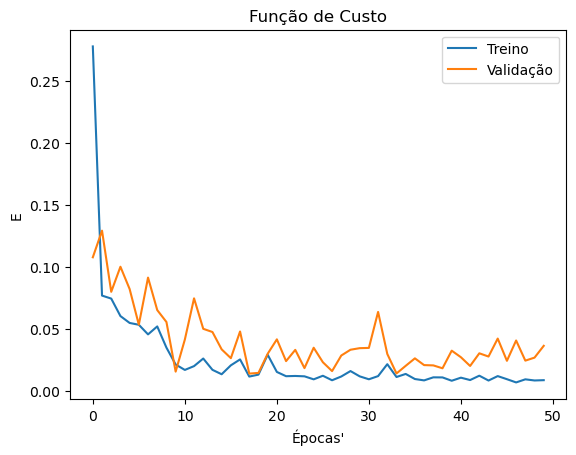

In [61]:
plt.figure()
plt.plot(history_2.history["loss"], label = "Treino")
plt.plot(history_2.history["val_loss"], label = "Validação")
plt.title("Função de Custo")
plt.ylabel("E")
plt.xlabel("Épocas'")
plt.legend()
plt.show()

43/43 [==============================] - 0s 1ms/step


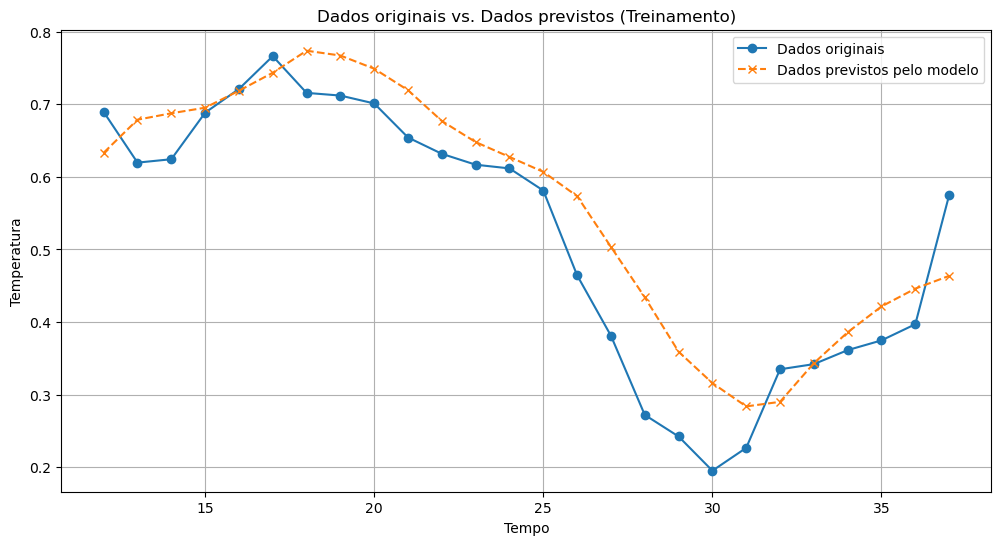

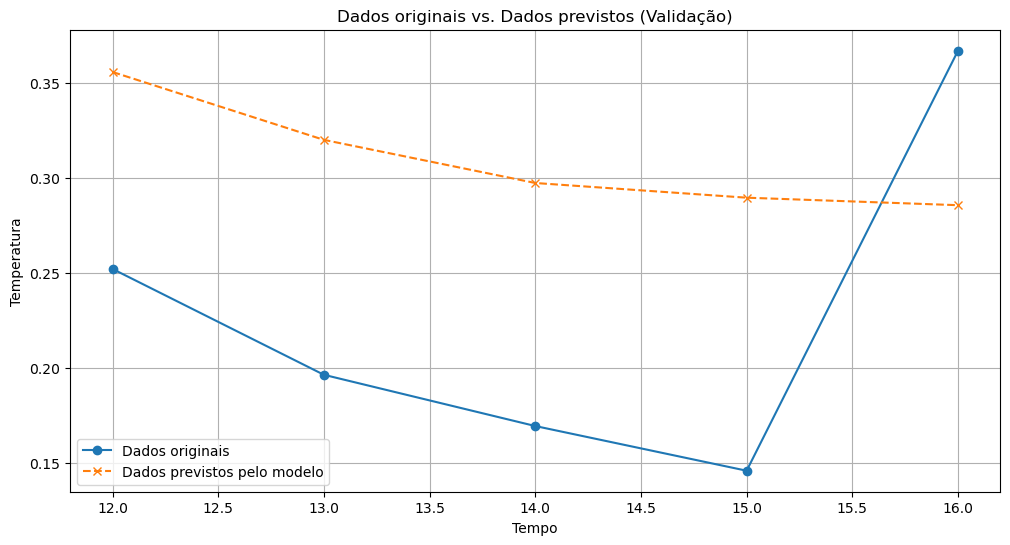

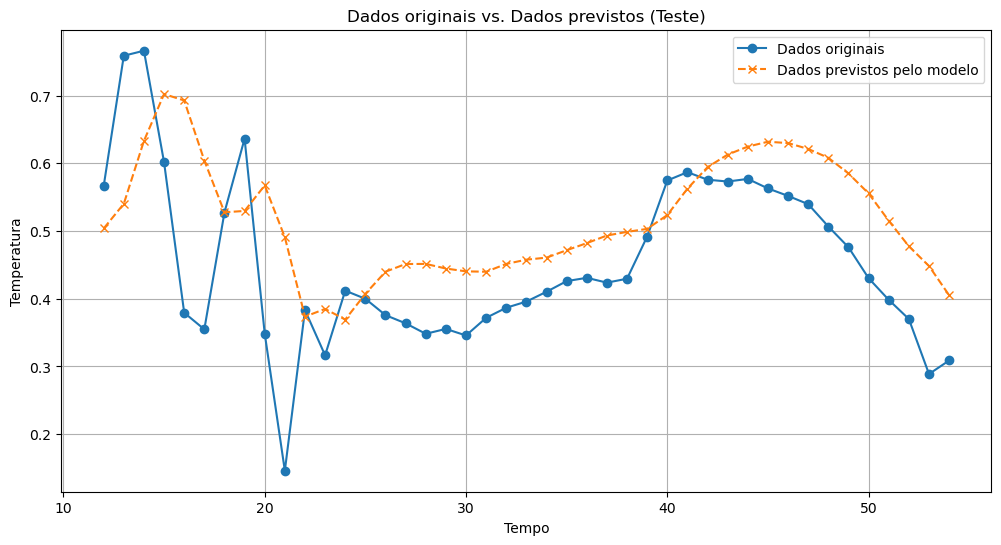

In [62]:
import matplotlib.pyplot as plt

#Treino
predicted_values = model_2.predict(train_2)

predicted_values = scaler.inverse_transform(predicted_values)
true_values = scaler.inverse_transform(train_2.targets)

# Create a time index for plotting
time_index = range(len(true_values) - len(predicted_values), len(true_values))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, [x[0] for x in true_values][12:], label="Dados originais", marker='o')
plt.plot(time_index, predicted_values, label="Dados previstos pelo modelo", linestyle='--', marker='x')
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos (Treinamento)")
plt.legend()
plt.grid(True)

#Validation:
# Generate predictions on the test dataset
predicted_values = model_2.predict(val_2)

# Inverse transform the scaled data to obtain actual values
# Replace the scaling logic with your own if you used a different method
predicted_values = scaler.inverse_transform(predicted_values)
true_values = scaler.inverse_transform(val_2.targets)

# Create a time index for plotting
time_index = range(len(true_values) - len(predicted_values), len(true_values))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, [x[0] for x in true_values][12:], label="Dados originais", marker='o')
plt.plot(time_index, predicted_values, label="Dados previstos pelo modelo", linestyle='--', marker='x')
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos (Validação)")
plt.legend()
plt.grid(True)

#Test:

# Generate predictions on the test dataset
predicted_values = model_2.predict(test_2)

# Inverse transform the scaled data to obtain actual values
# Replace the scaling logic with your own if you used a different method
predicted_values = scaler.inverse_transform(predicted_values)
true_values = scaler.inverse_transform(test_2.targets)

# Create a time index for plotting
time_index = range(len(true_values) - len(predicted_values), len(true_values))

# Plot the true values and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, [x[0] for x in true_values][12:], label="Dados originais", marker='o')
plt.plot(time_index, predicted_values, label="Dados previstos pelo modelo", linestyle='--', marker='x')
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos (Teste)")
plt.legend()
plt.grid(True)

plt.show()

43/43 [==============================] - 0s 1ms/step


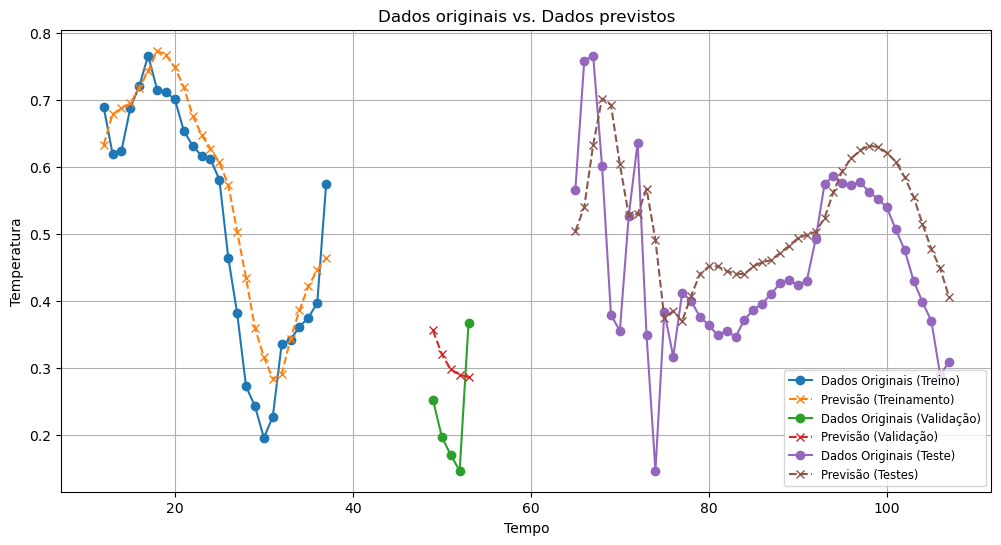

In [63]:
import matplotlib.pyplot as plt

# Train
predicted_values_train = model_2.predict(train_2)
predicted_values_train = scaler.inverse_transform(predicted_values_train)
true_values_train = scaler.inverse_transform(train_2.targets)

# Validation
predicted_values_val = model_2.predict(val_2)
predicted_values_val = scaler.inverse_transform(predicted_values_val)
true_values_val = scaler.inverse_transform(val_2.targets)

# Test
predicted_values_test = model_2.predict(test_2)
predicted_values_test = scaler.inverse_transform(predicted_values_test)
true_values_test = scaler.inverse_transform(test_2.targets)

# Create a time index for plotting
time_index_train = range(len(true_values_train) - len(predicted_values_train), len(true_values_train))
time_index_val = range(len(true_values_val) - len(predicted_values_val) + time_index_train[-1], len(true_values_val) + time_index_train[-1])
time_index_test = range(len(true_values_test) - len(predicted_values_test) + time_index_val[-1], len(true_values_test) + time_index_val[-1])

# Create a single canvas and plot all the curves
plt.figure(figsize=(12, 6))

# Train data
plt.plot(time_index_train, [x[0] for x in true_values_train][12:], label="Dados Originais (Treino)", marker='o')
plt.plot(time_index_train, predicted_values_train, label="Previsão (Treinamento)", linestyle='--', marker='x')

# Validation data
plt.plot(time_index_val, [x[0] for x in true_values_val][12:], label="Dados Originais (Validação)", marker='o')
plt.plot(time_index_val, predicted_values_val, label="Previsão (Validação)", linestyle='--', marker='x')

# Test data
plt.plot(time_index_test, [x[0] for x in true_values_test][12:], label="Dados Originais (Teste)", marker='o')
plt.plot(time_index_test, predicted_values_test, label="Previsão (Testes)", linestyle='--', marker='x')

# Set labels and title
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.title("Dados originais vs. Dados previstos")
plt.legend()

# Add legend
plt.legend(fontsize='small')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()